**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Fadi Ballou
- Amina Yussuf
- Jill Nomura
- Larry Mei
- Minh Vo

# Research Question

At UCSD, what is the grade you will expect from taking a certain course and is this GPA affected by what quarter you take?

## Background and Prior Work


We were curious about a correlation between professor ratings and income with the average received grade. We want to try to create a model that can take in a professor’s rating and create a prediction of the expected average grade from that course. We hope to potentially take into consideration a professor’s rating and income to try to find a correlation between that and previous average grades. It's important as well to take into consideration the department and role of each professor we're analyzing as we observe an income gap disparity amongst the different departments and categories here at UCSD. We plan on splitting them up into different categories just to try to create a more accurate model. The idea of this is to be an added resource for students when choosing their courses and professors for each coming quarter/semester. They can learn about each professor and get an understanding of whether this professor is one they want to take or not, which can be a crucial aspect for a student’s quarter.

In a study by Colleen Flaherty called No Satisfaction on Student Ratings of Instruction, she looked at who rated the course/professor and the extent of their rating. This is a potential confound in our project as this work concluded that there was a correlation between grade received and review given. Flaherty found that “students who receive better grades tend to report a subjectively more positive experience in their courses, regardless of the underlying reasons that led to their high performance” <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) and vice versa. This brings up a potential bias as a student’s success or failure isn’t always a consequence of the professor. **By encompassing the professors’ income, we hope that this creates a more accurate model by eliminating some bias.** With this bias, we want to also take into consideration proportion of classes that take the survey and if that could vary on class size. These are all possible confounds that we would hope to include in our analysis as we dive in further.

The COGS 108 Winter 2021 Group 46 project was one in which they looked at analyzing course difficulty and professor ratings. They examined the average GPA and the hours put into work related for that course each week in order to determine the level of difficulty where they concluded “unlike what we have guessed, students at UCSD are generally not biased by the difficulty of the course when trying to evaluate the teaching performance of their instructors” <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). We plan to take things in a different direction using the same dataset. **However, our intentions are to try to create a model that can predict the expected grade. By gathering the data of all the previous quarters that a professor taught that course, their ratings during each quarter, average GPA, expected GPA, and their salary, we plan on creating a model for future quarters on the same course for each professor.**

In a study called **Major Differences**, authors Steven W. Hemelt, Kevin Stange, Fernando Furquim, Andrew Simon, and John E. Sawyer look at at the different costs for colleges across the majors and departments. Some key points that we want to bring up is that there is a gap in expenditures for instructors (professors) and faculty for the different departments <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). They noted that more STEM based departments costed more for universities because of the greater cost of research resources, technology, and of course salaries for staff and professors. They also pointed out a reason for the higher cost for faculty in certain departments is dependent on the tenure track for each department. Those who are tenured on average earn a higher salary than adjunct instructors. Also broken down by their visualization, a higher proportion of STEM department instructors are on the tenure track, which could be a possible explanation for the income disparity. 

**Similarly to our predecesors from the COGS 108 Winter 2021 Group project that used the Capes dataset, we also find it best to use the same set of categories to break down the departments:**

**STEM:** Biology, Chemistry, Computer Science, Data Science, Mathematics, Physics, All Engineering;

**Social Science:** Political Science, Sociology, Psychology, Cognitive Science, Economics;

**Humanities:** Fine Arts, Literature, Language Studies, Theatre, Film, English, Philosophy, Visual Arts, History


References:

1. <a name="cite_note-1"></a> [^](#cite_ref-1)https://www.insidehighered.com/news/2022/01/19/study-grade-satisfaction-major-factor-student-evals

2. <a name="cite_note-2"></a> [^](#cite_ref-2)https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group046.ipynb

3. <a name="cite_note-3"></a> [^](#cite_ref-3)https://www.educationnext.org/major-differencecs-why-some-degrees-cost-colleges-more-than-others/


# Hypothesis



- Prediction: We want to create a prediction model that predicts the GPA students expect for taking the course
    - Some attribute that we are anticipating to improve the model are Course Name, Professor Name, When the course was held, professor income, professor rating, professor department, and number of student taking the course. 
- Hypothesis: We hypothesize that the GPA you get for taking a certain course is not effected by which quarter you are taking these course
    - Example: We hypothesize that taking COGS 108 in FA, WI, or SP will still yield to similar GPA. 

We generated this hypothesis because our group agreed that GPA of taking a course shouldn't be fluctualting quarter to quarter since it's not fair to other students. Although different professor generally teaches the same courses over the year, they should agree on a grading scheme and difficulties of the course within the department, so the final grade that they recieve is consistent. 
To test if this is actually reflected in reality, we decided to generate this hypothesis test on top of the prediction model.

## Setup

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import time
import requests
import json
import time

/var/folders/pc/skjhh69x6c365spmwqcs6p9h0000gn/T/ipykernel_65082/1776645494.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data

## Data overview
In order to proceed with this hypothesis and prediction, our group agreed that we must have variables such as GPA for taking a course, course name, professor name, and when the course was held (year and quarter) as a bare minimum. On top of this attribute, our group came up with more attributes that can possibly help us improve the prediction model. These variables include professor rating from the students,  professor income, number of students taking the course, student's performance and student's engagement in couse.

In terms of number of observations, our team agreed on about 8,000,000 - 12,000,000 observations. This number came from our agreement that we would like approximately 10 years of data and learning that UCSD offers approximately 4000 courses, assuming each being taught around 2-3 times throughout the school year with an approximate of 100 students per course, that will result in about 8,000,000 to 12,000,000 data. 
In order to collect such information, we need to take a survey from each student that actually took these classes. 

In order to organize such massive data, we would consider storing these in the relational database. Since many observations share a common value (such as professor name, course name, etc) we should rather have multiple tables that are connected together by the foreign key and access to these data by SQL. 

**For each dataset include the following information**
- Dataset #1
  - Dataset Name: CAPES Response Dataset
  - Link to the dataset: [Capes dataset on Kaggle](https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share)
  - Number of observations: 62,219 
  - Number of variables: 13
- Dataset #2 
  - Dataset Name: UC Income Dataset
  - Link to the dataset: [UC income website](https://ucannualwage.ucop.edu/wage/)
  - Number of observations: 362,650
  - Number of variables: 5 (Year, First Name, Last Name, Job Title/Department, Income)

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.


**UCSD Capes Dataset:**

This dataset contains the information of all the courses offered in UCSD from Summer of 2007 to Spring of 2023. Each observation equates to the course offered in particular school year, and basic information such as Instructor name, Course name, number of students enrolled, etc are included as course information. On top of this, the most important atrributes in this dataset are Average Grade Receieved because that is exactly what we want to predict on our model. Since there are 13 attributes in this dataset after cleaning, please refer to the data cleaning process where the datatypes are explained. <br>
This dataset needs quite a lot of preprocessing since all the attributes are stored in strings. GPA are recorded as GPA(Letter Grade), which needs to be stripped and Course name includes the full course name as well as abvreviation. Additionally, we found that there are good proportion of NAN value in Average grade received in these course, which needs to be analyzed to see if the values can be inputed. 

**UC Income Dataset:**

This dataset contains the income data for every UC School's professors, staff, lecturers, etc. Anyone that got paid by the school in any way is documented in this dataset from the years 2010-2022. The variables we will look at are the year (2010-2022), named professors, gross pay, and job title/department. This is important because we want to look at trends of income change over the 12 year span along with the dispariteies in pay gap amongst different departments. The names and department tyeps are strings, the year is an int, and the gross pay is a floating point type. We plan on cleaning the data by removing the other schools and focusing solely on UCSD. We then plan on removing anyone who's names are censored out just so we can compare this data with professor's capes data. We used a backend approach mapping API endpoints to be able to gather the data which is significantly quicker (15-30 seconds) then taking a front end approach to do web scrapping using Selenium (1.5-2 hours).

**How we plan to combine these datasets together:**

We are planning to merge these two dataset by the name of the professor and the year that they taught. Our plan is to create a dataset that is something more similar to the UCSD Capes dataset, but adding an additional collumns of income for the professors. 

## UCSD CAPES Response Dataset

In [2]:
#Read in the df
capes_df = pd.read_csv("capes_data.csv").drop(labels = 'Evalulation URL', axis = 1)
capes_df

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67)
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92)
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07)
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00)
...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS 105D - Aesthetics/Chinese Calligraphy (A),SU07,17,13,100.0%,100.0%,2.33,A (4.00),NaN
63359,Guerrero Raul M.,VIS 106A - Painting: Image Making (A),SU07,16,14,92.9%,92.9%,7.21,A- (3.79),NaN
63360,Mangolte Babette,VIS 194S - Fantasy In Film (A),SU07,80,57,74.1%,26.4%,4.27,B (3.21),NaN
63361,Holland Nicole Murphy,VIS 22 - Formations of Modern Art (A),SU07,40,33,100.0%,96.7%,4.32,B+ (3.62),NaN


### Cleaning the Data

In [3]:
#List of function used to standardize the data

#Function used to clean Average Grade Expected and Average Grade Received columns
def standardize_grade(string):
    
    if isinstance(string, str):
        string = string.strip()
        
        string = string.replace('(', '')
        string = string.replace('A', '')
        string = string.replace('B', '')
        string = string.replace('C', '')
        string = string.replace('D', '')
        string = string.replace('F', '')
        string = string.replace('+', '')
        string = string.replace('-', '')
        string = string.replace('(', '')
        string = string.replace(')', '')
        
        string = string.strip()
        string = float(string)
        
    
    return string 

#Function used to clean Percentage Recommended Class and Percentage Recommended Professor columns
def standardize_percentage(string):
    if isinstance(string, str):
        string = string.strip()
        
        string = string.replace('%', '')
        string = float(string)
        
    return string

#Function used to clean Course column
def standardize_course(string):
    value = string.split('-')
    string = value[0].strip()
    return string

#Function used to extract a Department name
def standardize_department(string):
    value = string.split(' ')
    string = value[0].strip()
    return string

In [4]:
#Using function standardize_grade to drop the letter grade and keep the GPA of course
capes_df['Average Grade Expected'] = capes_df['Average Grade Expected'].apply(standardize_grade)
capes_df['Average Grade Received'] = capes_df['Average Grade Received'].apply(standardize_grade)

#Using function standardize_percentage to change the convert column from string to float
capes_df['Percentage Recommended Class'] = capes_df['Percentage Recommended Class'].apply(standardize_percentage)
capes_df['Percentage Recommended Professor'] = capes_df['Percentage Recommended Professor'].apply(standardize_percentage)

#Using function standardize_course to retrieve only the Course name and number
capes_df['Course'] = capes_df['Course'].apply(standardize_course)

#Using function standardize_department to create another column of just the department
department = capes_df['Course'].apply(standardize_department)
capes_df['Department'] = department

capes_df

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Department
0,Butler Elizabeth Annette,AAS 10,SP23,66,48,93.5,100.0,2.80,3.84,3.67,AAS
1,Butler Elizabeth Annette,AAS 170,SP23,20,7,100.0,100.0,2.50,3.86,3.92,AAS
2,Jones Ian William Nasser,ANAR 111,SP23,16,3,100.0,100.0,3.83,3.67,NaN,ANAR
3,Shtienberg Gilad,ANAR 115,SP23,26,6,100.0,83.3,3.83,3.50,3.07,ANAR
4,Braswell Geoffrey E.,ANAR 155,SP23,22,9,100.0,100.0,5.17,4.00,4.00,ANAR
...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS 105D,SU07,17,13,100.0,100.0,2.33,4.00,NaN,VIS
63359,Guerrero Raul M.,VIS 106A,SU07,16,14,92.9,92.9,7.21,3.79,NaN,VIS
63360,Mangolte Babette,VIS 194S,SU07,80,57,74.1,26.4,4.27,3.21,NaN,VIS
63361,Holland Nicole Murphy,VIS 22,SU07,40,33,100.0,96.7,4.32,3.62,NaN,VIS


In [5]:
#Split the quarter column into Quarter and Year
capes_df['Year'] = '20' + capes_df['Quarter'].str[-2:]
capes_df['Year'] = capes_df['Year'].astype(int)
capes_df['Quarter'] = capes_df['Quarter'].str[:2]

In [6]:
#Determined the percentage of students responded out of all the student enrolled in course
capes_df.loc[:,'Percentage Responded'] = (capes_df['Total CAPEs Given']/capes_df['Total Enrolled in Course'])*100
capes_df['Percentage Responded'] = capes_df['Percentage Responded'].astype(float).round(2)
df_columns = ['Instructor', 'Department', 'Course', 'Quarter', 'Year', 'Percentage Responded','Total Enrolled in Course', 'Total CAPEs Given','Percentage Recommended Class', 'Percentage Recommended Professor', 'Study Hours per Week', 'Average Grade Expected' ,'Average Grade Received']
capes_df = capes_df[df_columns]
capes_df.columns = ['Instructor', 'Department', 'Course', 'Quarter', 'Year', 'Percentage_Responded','Total_Enrolled', 'Total_Response','Percentage_Recommended_Class', 'Percentage_Recommended_Professor', 'Study_Hours_per_Week', 'Average_Grade_Expected' ,'Average_Grade_Received']
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.84,3.67
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.86,3.92
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.67,NaN
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.50,3.07
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,4.00,NaN
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.79,NaN
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.21,NaN
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.62,NaN


In [7]:
capes_df.dtypes

Instructor                           object
Department                           object
Course                               object
Quarter                              object
Year                                  int32
Percentage_Responded                float64
Total_Enrolled                        int64
Total_Response                        int64
Percentage_Recommended_Class        float64
Percentage_Recommended_Professor    float64
Study_Hours_per_Week                float64
Average_Grade_Expected              float64
Average_Grade_Received              float64
dtype: object

#### Cleaning is complete!!

### Analyze the missingness in Average_Grade_Received

#### Analyze if Average_Grade_Received is MAR FROM "Department" column¶

In [8]:
#Create a new column of bool dtype where Average_Grade_Received is missing is True, otherwise False
capes_df = capes_df.assign(Average_Grade_Received_missing = capes_df['Average_Grade_Received'].isna())

In [9]:
#Computing a observed statistic
pivoted = (
    capes_df
    .pivot_table(index = 'Department', columns = 'Average_Grade_Received_missing', aggfunc='size')
    .apply(lambda x: x/x.sum())
    ).fillna(0)
    
obs_tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd  

0.3429344159605351

In [10]:
#Performing Permutation testing to see if the missingness is MAR
#We are computing tvd, basically a difference in distribution when we shuffle the Department column
#We are doing this shuffling 500 times and compute the result of each tvd in tvds
n_repetitions = 500
shuffled = capes_df.copy()

tvds = []
for _ in range(n_repetitions):
    shuffled['Department'] = np.random.permutation(shuffled["Department"])
    
    pivoted = (
        shuffled
        .pivot_table(index = 'Department', columns = 'Average_Grade_Received_missing', aggfunc='size')
        .apply(lambda x: x/x.sum())
    )
    
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)
tvds

[0.03276509954682401,
 0.03659142559434835,
 0.032955926061456094,
 0.032455682069947006,
 0.03166754521471142,
 0.028252114338804594,
 0.03455192338019146,
 0.028258562978201226,
 0.03169153690686938,
 0.03036497587286036,
 0.03515271665586435,
 0.031356806752845495,
 0.03350809406574099,
 0.03448305913033939,
 0.03333101509770488,
 0.03220998816471872,
 0.030008607612609504,
 0.029560905333899233,
 0.034422749653697265,
 0.028719281610407977,
 0.029390814562508756,
 0.024863715281072497,
 0.03072484753414522,
 0.03424400177927374,
 0.03142630544760069,
 0.03479990761291463,
 0.032339747962017856,
 0.03350989693116954,
 0.03601122666070698,
 0.03650455501671772,
 0.03230854480814571,
 0.036045635528855036,
 0.029472176074572913,
 0.028287838610314857,
 0.03568806163723401,
 0.030421309370740054,
 0.032027005696161695,
 0.031900777208030126,
 0.03653069377461822,
 0.03630167404892616,
 0.03261594173615233,
 0.03195620090075548,
 0.02986540353709917,
 0.033412114273313503,
 0.0323946953

In [11]:
#Compute the p-value
np.mean(np.array(tvds) >= obs_tvd)
# Conclusion: We reject the null and claim that missingness in Average_Grade_Received are depended on Department!

0.0

#### Because Average_Grade_Received is MAR, we will want to perform imputation on this, but there is one problem

pivoted

 As you can see, there is some value in this pivot table where the value is 0. This means that there is no class where there was Average_Grade_Received was recorded in that department

#### Problem: Imputation is physically impossible for some departments since some department doesn't record Average_Grade_Received AT ALL

#### IDEA: We can impute the values in expected average grades instead 

To do this, we need to see if the distribution of  Average_Grade_Expected and Average_Grade_Received are similar
- We will find the average difference between expected and actual grades to see if there is significant difference between these distribution

In [12]:
#Positive number = Average_Grade_Received > Average_Grade_Expected
#Negative number = Average_Grade_Expected > Average_Grade_Received
not_nan = capes_df[capes_df['Average_Grade_Received'].notna()]
difference_gpa = not_nan['Average_Grade_Received'] - not_nan['Average_Grade_Expected'].dropna()
difference_gpa.head

#Conclude that student will overestimate the grade recieved compared to actual grade they recieve!
#Actual grade they recieve are better estimate than estimted grade!

<bound method NDFrame.head of 0       -0.17
1        0.06
3       -0.43
4        0.00
5       -1.05
         ... 
63005   -0.29
63006   -0.13
63007   -0.31
63008   -0.11
63009   -0.15
Length: 45735, dtype: float64>

In [13]:
#On average, Average_Grade_Expected are 0.20 GPA higher than Average_Grade_Received
difference_gpa.mean()

-0.20768180115876897

In [14]:
#And this distribution is not that spread out - reference the histogram below, which is good!
difference_gpa.std()

0.27823147661775066

Text(0.5, 1.0, 'Difference in Grade Receieve and Grade Expected')

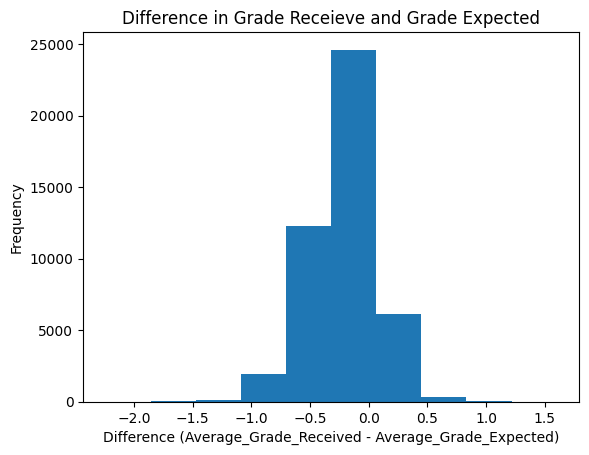

In [15]:
difference_gpa.plot.hist()
plt.xlabel('Difference (Average_Grade_Received - Average_Grade_Expected)')
plt.ylabel('Frequency')
plt.title('Difference in Grade Receieve and Grade Expected')


In [16]:
#Imputed Average_Grade_Received with Average_Grade_Expected with the average difference in GPA!
capes_df['Average_Grade_Received'] = capes_df['Average_Grade_Received'].fillna(capes_df['Average_Grade_Expected'] + difference_gpa.mean() )
capes_df['Average_Grade_Received'] = capes_df['Average_Grade_Received'].round(2)
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.84,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.86,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.67,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.50,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,4.00,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.79,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.21,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.62,3.41,True


##### Check for NAN in Average_Grade_Received

In [17]:
#There is still 1144 observation that Average_Grade_Received is missing. 
#This means that these observation have both Average_Grade_Received and Average_Grade_Expected missing, which is meaningless for prediction, so we will drop these observations.  
sum(capes_df['Average_Grade_Received'].isna())

1144

In [18]:
df = capes_df.dropna(subset=['Average_Grade_Received']).drop(columns = 'Average_Grade_Expected')
df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.41,True


#### Imputation is complete!!

### Analyze the Percentage_Responded column

In [19]:
#The percentage of 109.82 is not adding up - analyze this row
capes_df['Percentage_Responded'].value_counts()

Percentage_Responded
50.00     1853
33.33     1193
100.00    1022
40.00      840
66.67      708
          ... 
79.30        1
75.62        1
67.05        1
66.37        1
109.82       1
Name: count, Length: 6223, dtype: int64

In [20]:
# 273/62219  = 0.44% of observation have Percentage_Responded greater that 100%
responding_weird = capes_df[capes_df['Percentage_Responded'] > 100]
responding_weird.shape

(273, 14)

In [21]:
responding_weird

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received,Average_Grade_Received_missing
14419,Moshiri Alexander Niema,CSE,CSE 100,SP,2020,149.73,187,280,97.7,99.6,11.51,3.66,3.72,False
19455,Kim Byung Cho,MGT,MGT 177,SP,2019,110.00,10,11,88.9,100.0,5.39,2.63,2.42,True
20678,Ehrich Kristine R,MGT,MGT 103,WI,2019,101.52,66,67,92.5,97.0,4.98,3.44,3.24,False
20681,Demill Burritt,MGT,MGT 103,WI,2019,109.09,22,24,91.7,91.7,3.83,3.43,3.25,False
20692,Zhu Kevin Xiaoguo,MGT,MGT 127,WI,2019,104.17,48,50,92.0,96.0,3.66,3.72,3.69,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63247,Orin Adam Edward,PHYS,PHYS 1AL,SU,2007,114.29,14,16,86.7,83.3,4.50,3.69,3.48,True
63327,Jules-Rosette Bennetta W.,SOCC,SOCC 157,SU,2007,116.67,12,14,100.0,100.0,6.30,4.00,3.79,True
63334,Jules-Rosette Bennetta W.,SOCI,SOCI 157,SU,2007,116.67,12,14,100.0,100.0,6.30,4.00,3.79,True
63341,Salovey Todd,TDAC,TDAC 1,SU,2007,107.14,14,15,100.0,100.0,3.97,3.79,3.58,True


After discussiong this with Prof Niema (data on row 1) through Prof Shannon, we learned that this specific year is where COVID restriction effected students to attend through zoom. CSE 100 were cotaught with 3 instructors and students were able to attend to any of the favorite lecutres and this caused the evaluation to accept more than the number of students initially enrolled. 

When we are creating a prediction model, we want to avoid the model to think that Percentage_Respondid > 100 is a valid data, so our group decided that it is better to drop these column to avoid confusioins. Additionally, these rows are only 0.44% of the data that we have, so we agreed that it's not going to impact us significantly by dropping these alltogether. 

In [22]:
capes_df = capes_df[capes_df['Percentage_Responded'] <= 100]
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.84,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.86,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.67,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.50,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,4.00,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.79,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.21,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.62,3.41,True


##### We are completely done with processing CAPES Dataset!

### Summarizing the cleaned dataset

In [23]:
capes_df.describe()

,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received
count,63090.000000,63090.000000,63090.000000,63090.000000,63090.000000,63090.000000,63089.000000,61614.000000,61955.000000
mean,2015.600174,51.886993,77.624838,39.543509,89.239691,89.740312,5.624891,3.528250,3.319299
std,4.656260,20.947893,87.995975,48.952333,12.613930,14.262437,2.563105,0.321558,0.398172
min,2007.000000,5.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.330000,0.550000
25%,2012.000000,36.240000,20.000000,9.000000,83.300000,85.000000,4.000000,3.310000,3.040000
50%,2016.000000,47.400000,41.000000,20.000000,92.900000,95.100000,5.300000,3.540000,3.350000
75%,2020.000000,66.670000,103.000000,50.000000,100.000000,100.000000,6.970000,3.780000,3.650000
max,2023.000000,100.000000,1101.000000,588.000000,100.000000,100.000000,20.500000,4.000000,4.000000


In [24]:
capes_df.dtypes

Instructor                           object
Department                           object
Course                               object
Quarter                              object
Year                                  int32
Percentage_Responded                float64
Total_Enrolled                        int64
Total_Response                        int64
Percentage_Recommended_Class        float64
Percentage_Recommended_Professor    float64
Study_Hours_per_Week                float64
Average_Grade_Expected              float64
Average_Grade_Received              float64
Average_Grade_Received_missing         bool
dtype: object

In [25]:
#The dataset is in tidy format!
capes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63090 entries, 0 to 63362
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Instructor                        63090 non-null  object 
 1   Department                        63090 non-null  object 
 2   Course                            63090 non-null  object 
 3   Quarter                           63090 non-null  object 
 4   Year                              63090 non-null  int32  
 5   Percentage_Responded              63090 non-null  float64
 6   Total_Enrolled                    63090 non-null  int64  
 7   Total_Response                    63090 non-null  int64  
 8   Percentage_Recommended_Class      63090 non-null  float64
 9   Percentage_Recommended_Professor  63090 non-null  float64
 10  Study_Hours_per_Week              63089 non-null  float64
 11  Average_Grade_Expected            61614 non-null  float64
 12  Average_G

## UC Income Dataset

In [26]:
start = time.time()

post_url = 'https://ucannualwage.ucop.edu/wage/search.action'

# Specify the range of years you want to include
years = range(2010, 2023)

# Create an empty list to store the dataframes for each year
dfs = []

for year in years:
    form_data = {
        '_search': 'false',
        'nd': '1708407179006',
        'rows': '52000',
        'page': '1',
        'sidx': 'EAW_LST_NAM',
        'sord': 'asc',
        'year': str(year),  # Convert year to string
        'location': 'San Diego',
        'firstname': '',
        'lastname': '',
        'title': '',
        'startSal': '',
        'endSal': ''
    }

    headers = {
        'Accept': 'application/json, text/javascript, */*; q=0.01',
        'Accept-Language': 'en-US,en;q=0.5',
        'Content-Type': 'application/x-www-form-urlencoded',
        'X-Requested-With': 'XMLHttpRequest',
        'Origin': 'https://ucannualwage.ucop.edu',
        'Referer': 'https://ucannualwage.ucop.edu/wage/',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin'
    }

    response = requests.post(post_url, data=form_data, headers=headers)

    json_data = json.loads(response.text.replace("'", '"'))
    rows = [row["cell"] for row in json_data['rows']]
    df = pd.DataFrame(rows)
    
    # Add a new column for the year
    df['Year'] = year
    
    dfs.append(df)

# Concatenate all dataframes into one
income_df = pd.concat(dfs, ignore_index=True)

# display(final_df.iloc[35780:35797])

# print("Time to parse and dataframeify:", time.time() - start)

KeyboardInterrupt: 

In [ ]:
income_df = income_df.rename(columns={1: 'Year', 3: 'First Name', 4: 'Last Name', 5: 'Job Title', 6: 'Income'})
income_df = income_df.iloc[:, [1, 3, 4, 5, 6]]  # Assign the result back to the DataFrame

In [ ]:
income_df = income_df[~(income_df['First Name'].str.contains('\*') | income_df['Last Name'].str.contains('\*'))]

We use API endpoints to load in the data using a dictionary. This way we can leverage the backend of the webpage that has the HTML pageinated table to quickly get and create the dataframe of UC San Diego Income data. We originally used selenium and beautiful soup to parse the table. However, due to the large quantity of elements, it took over an hour and a half to complete the creation of the dataframe. This new approach is much faster, taking about 30 seconds. Next, in the 2 code blocks above, we started the cleaning process by renaming the columns to the columns we want (Year, First Name, Last Name, Job Title, and Income), and removed the rest. We then went through and removed censored names. These names are a combination of tutors, TAs, and other faculty that wouldn't be on our CAPES dataset to begin with. After this we print the dataframe below to get our initial dataframe to start working with.

In [ ]:
income_df

In [ ]:
income_df.to_csv('cleaned_income_data.csv')

In [2]:
income_df = pd.read_csv('cleaned_income_data.csv')
income_df

,Unnamed: 0,Year,First Name,Last Name,Job Title,Income
0,12350,2010,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...
362645,548579,2022,THOMAS,ZUST,ELECTR TCHN,68109.00
362646,548580,2022,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362647,548581,2022,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362648,548582,2022,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


In [3]:
null_values = income_df.isnull().any()
null_values

Unnamed: 0    False
Year          False
First Name     True
Last Name      True
Job Title      True
Income        False
dtype: bool

We can see from this, we have null values in the columns of First Name, Last Name, and Job Title. While we have removed censored names, we have to incorporate for true null values. We will remove any null first and last names first since they wouldn't correspond with our CAPES dataset anyways.

In [ ]:
income_df = income_df.dropna(subset=['First Name', 'Last Name'])
null_values = income_df.isnull().any()
null_values

In [ ]:
income_df.shape

We've removed all rows where there are null values. We will leave the Job Title column for now until after we cross reference to see if those employees are in the CAPES Dataset. If they aren't then those rows will be removed. If they are, then we can manually go in and input their Job Title and Department. After removing null names, this dataset dropped by 48 entries to become 352,602 entries.

## Average Income (before splitting by department)

In [ ]:
# Get the different types of data in each column to make sure we can get the average value for income
income_df.dtypes

In [ ]:
# Get the average value of the income column before splitting by department
# average_income = income_df['Income'].mean()
average_income = round(income_df['Income'].mean(), 2)
print("$" + str(average_income))

We can look at the income data and describe how it looks.

In [ ]:
income_df['Income'].describe()

In [ ]:
income_df = income_df.rename(columns={0: 'Index'})
# income_df.head()
income_df.describe()

In [ ]:
print(income_df['Job Title'].unique())

We will get the average of all the incomes from each year and try to plot them on a bar graph to see the general trend of income for each year

In [ ]:
average_income_years = income_df.groupby('Year')['Income'].mean().round(2).tolist()
# average_income_years
average_df = income_df.groupby('Year')['Income'].mean().round(2).reset_index()

# Rename the columns for clarity
average_df.columns = ['Year', 'Average Income']
average_df

In [ ]:
# Plotting trends of income over the 13 years
plt.plot(average_df['Year'], average_df['Average Income'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title('Trend of Average Income Over Time')
plt.grid(True)
plt.show()

The next thing we want to do is remove individuals who aren't professors/lecturers. Basically, anyone that isn't be on the capes dataset won't be in the dataframe for the income. Leaving all individuals in the dataframe would present a confound as it would skew or alter the data in our analysis to have people who arent teaching impacting our conclusion. We will create a function below that can ensure that everyone in the income dataset is in the capes data set to ensure we have more internal validity in this dataset.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [27]:
avg_dep = capes_df.groupby("Department")["Average_Grade_Received"].mean()

Text(0.5, 1.0, 'Average of Average Grade By Department')

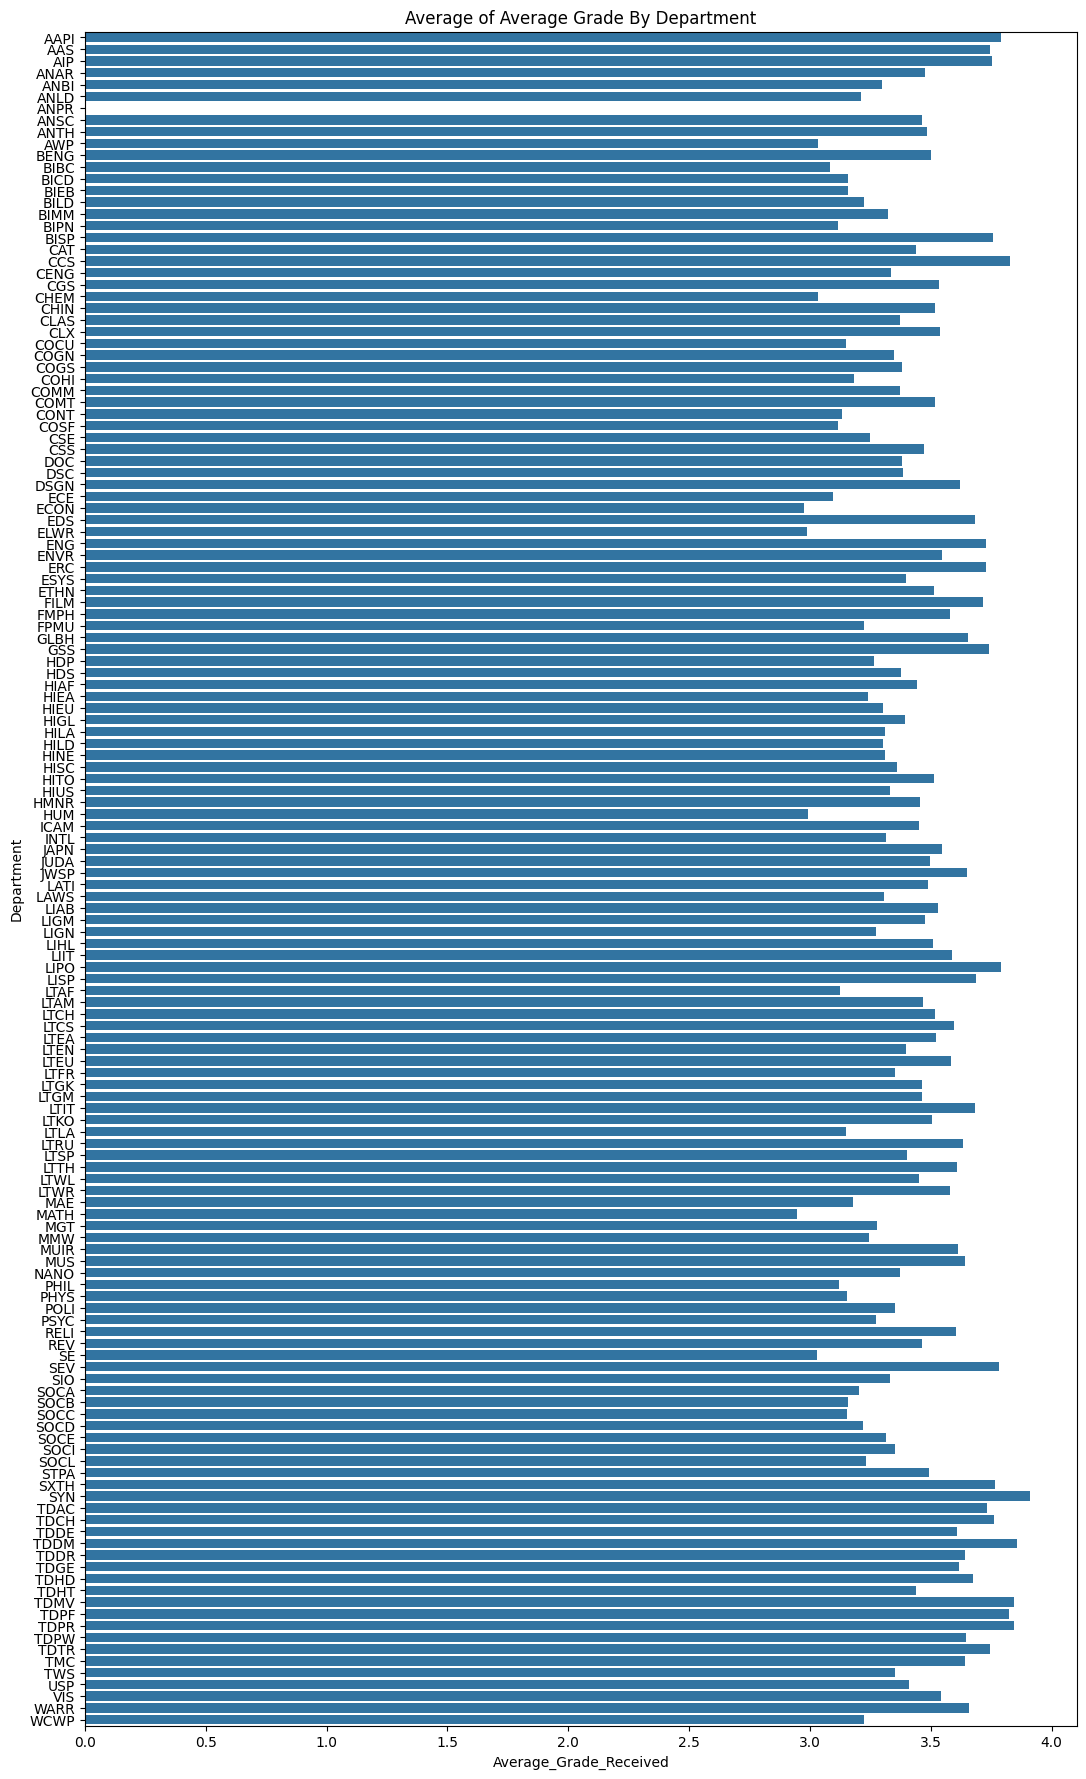

In [28]:
plt.figure(figsize=(12.8,22))
sns.barplot(avg_dep, orient='h')
plt.title('Average of Average Grade By Department')

In [29]:
### Department With Lowest GPA
avg_dep.index[avg_dep.argmin()], avg_dep.iloc[avg_dep.argmin()]

('MATH', 2.9454634146341463)

In [30]:
### Department With Highest GPA
avg_dep.index[avg_dep.argmax()], avg_dep.iloc[avg_dep.argmax()]

('SYN', 3.9093548387096773)

In [1]:
capes_df

NameError: name 'capes_df' is not defined

In [31]:
avg_year_expected = capes_df.groupby("Year")["Average_Grade_Expected"].mean()
avg_year_received = capes_df.groupby("Year")["Average_Grade_Received"].mean()

Text(0, 0.5, 'Average GPA')

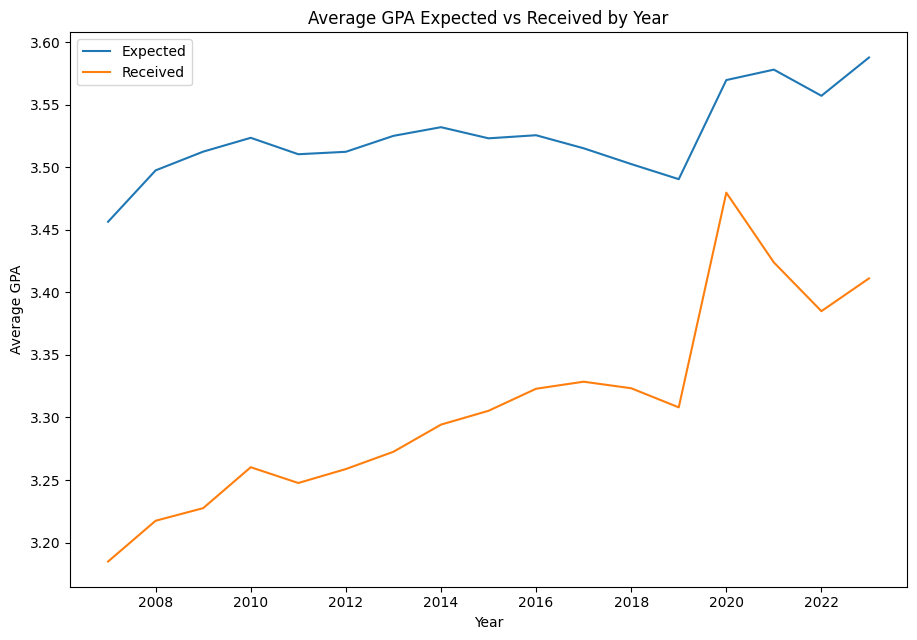

In [ ]:
plt.figure(figsize=(10.8, 7.2))
plt.plot(avg_year_expected)
plt.plot(avg_year_received)
plt.legend(['Expected', 'Received'])
plt.title('Average GPA Expected vs Received by Year')
plt.xlabel('Year')
plt.ylabel('Average GPA')

In [32]:
avg_qtr_expected = capes_df.groupby("Quarter")["Average_Grade_Expected"].mean()
avg_qtr_received = capes_df.groupby("Quarter")["Average_Grade_Received"].mean()

Text(0, 0.5, 'Average GPA')

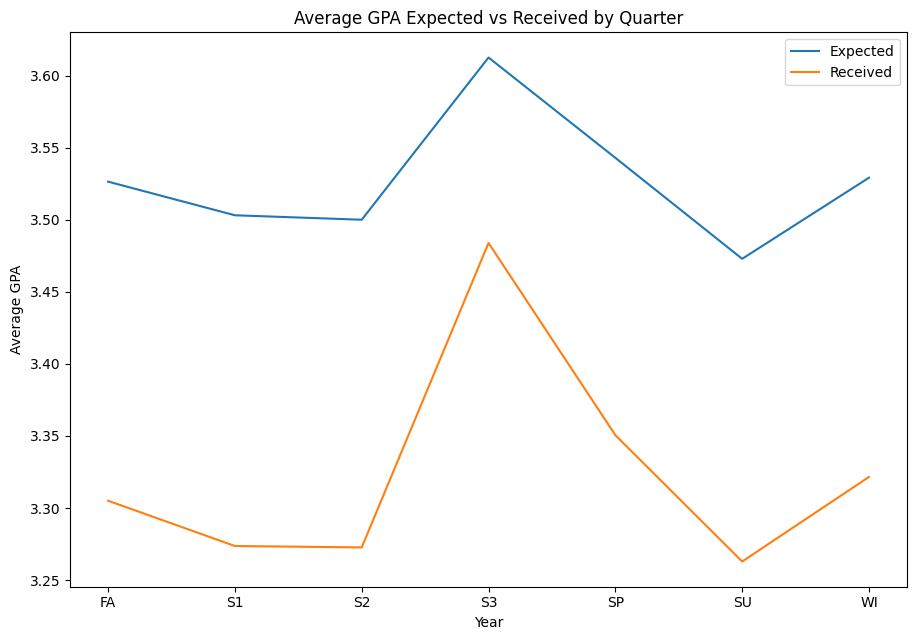

In [36]:
plt.figure(figsize=(10.8, 7.2))
plt.plot(avg_qtr_expected)
plt.plot(avg_qtr_received)
plt.legend(['Expected', 'Received'])
plt.title('Average GPA Expected vs Received by Quarter')
plt.xlabel('Year')
plt.ylabel('Average GPA')

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |